<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Launch Sites Locations Analysis with Folium**


Estimated time needed: **40** minutes


The launch success rate may depend on many factors such as payload mass, orbit type, and so on. It may also depend on the location and proximities of a launch site, i.e., the initial position of rocket trajectories. Finding an optimal location for building a launch site certainly involves many factors and hopefully we could discover some of the factors by analyzing the existing launch site locations.


In the previous exploratory data analysis labs, you have visualized the SpaceX launch dataset using `matplotlib` and `seaborn` and discovered some preliminary correlations between the launch site and success rates. In this lab, you will be performing more interactive visual analytics using `Folium`.


## Objectives


This lab contains the following tasks:

*   **TASK 1:** Mark all launch sites on a map
*   **TASK 2:** Mark the success/failed launches for each site on the map
*   **TASK 3:** Calculate the distances between a launch site to its proximities

After completed the above tasks, you should be able to find some geographical patterns about launch sites.


Let's first import required Python packages for this lab:


In [1]:
import piplite
await piplite.install(['folium'])
await piplite.install(['pandas'])

In [2]:
import folium
import pandas as pd

In [3]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

If you need to refresh your memory about folium, you may download and refer to this previous folium lab:


[Generating Maps with Python](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module\_3/DV0101EN-3-5-1-Generating-Maps-in-Python-py-v2.0.ipynb)


In [4]:
## Task 1: Mark all launch sites on a map


First, let's try to add each site's location on a map using site's latitude and longitude coordinates


The following dataset with the name `spacex_launch_geo.csv` is an augmented dataset with latitude and longitude added for each site.


In [5]:
# Download and read the `spacex_launch_geo.csv`
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv'
resp = await fetch(URL)
spacex_csv_file = io.BytesIO((await resp.arrayBuffer()).to_py())
spacex_df=pd.read_csv(spacex_csv_file)
spacex_df.head(5)

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Landing Outcome,class,Lat,Long
0,1,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0.0,LEO,SpaceX,Failure (parachute),0,28.562302,-80.577356
1,2,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel o...",0.0,LEO (ISS),NASA (COTS) NRO,Failure (parachute),0,28.562302,-80.577356
2,3,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2+,525.0,LEO (ISS),NASA (COTS),No attempt,0,28.562302,-80.577356
3,4,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500.0,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356
4,5,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677.0,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356


In [70]:
data=spacex_df
data.head(2)

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Landing Outcome,class,Lat,Long
0,1,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0.0,LEO,SpaceX,Failure (parachute),0,28.562302,-80.577356
1,2,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel o...",0.0,LEO (ISS),NASA (COTS) NRO,Failure (parachute),0,28.562302,-80.577356


In [29]:
data['Landing Outcome'].unique()

array(['Failure   (parachute)', 'No attempt', 'Controlled (ocean)',
       'Uncontrolled (ocean)', 'Failure  (drone ship)',
       'Precluded  (drone ship)', 'Success  (ground pad)',
       'Failure (drone ship)', 'Success  (drone ship)',
       'Success (drone ship)', 'Success (ground pad)'], dtype=object)

In [48]:
data.head(5)

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Landing Outcome,class,Lat,Long
0,1,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0.0,LEO,SpaceX,Failure (parachute),0,28.562302,-80.577356
1,2,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel o...",0.0,LEO (ISS),NASA (COTS) NRO,Failure (parachute),0,28.562302,-80.577356
2,3,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2+,525.0,LEO (ISS),NASA (COTS),No attempt,0,28.562302,-80.577356
3,4,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500.0,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356
4,5,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677.0,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356


In [77]:
data1=data[data["Landing Outcome"].str.contains("Success")]
data2=data1[data1['Date'].between('2010-06-04','2017-03-20')] #filter the data by date
date_sort=data2.sort_values(by='Date', ascending=False) #sort the data by date in descending order
date_sort

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Landing Outcome,class,Lat,Long
36,30,2017-02-19,14:39:00,F9 FT B1031.1,KSC LC-39A,SpaceX CRS-10,2490.0,LEO (ISS),NASA (CRS),Success (ground pad),1,28.573255,-80.646895
28,29,2017-01-14,17:54:00,F9 FT B1029.1,VAFB SLC-4E,Iridium NEXT 1,9600.0,Polar LEO,Iridium Communications,Success (drone ship),1,34.632834,-120.610745
25,28,2016-08-14,5:26:00,F9 FT B1026,CCAFS LC-40,JCSAT-16,4600.0,GTO,SKY Perfect JSAT Group,Success (drone ship),1,28.562302,-80.577356
24,27,2016-07-18,4:45:00,F9 FT B1025.1,CCAFS LC-40,SpaceX CRS-9,2257.0,LEO (ISS),NASA (CRS),Success (ground pad),1,28.562302,-80.577356
22,25,2016-05-27,21:39:00,F9 FT B1023.1,CCAFS LC-40,Thaicom 8,3100.0,GTO,Thaicom,Success (drone ship),1,28.562302,-80.577356
21,24,2016-05-06,5:21:00,F9 FT B1022,CCAFS LC-40,JCSAT-14,4696.0,GTO,SKY Perfect JSAT Group,Success (drone ship),1,28.562302,-80.577356
20,23,2016-04-08,20:43:00,F9 FT B1021.1,CCAFS LC-40,SpaceX CRS-8,3136.0,LEO (ISS),NASA (CRS),Success (drone ship),1,28.562302,-80.577356
18,20,2015-12-22,1:29:00,F9 FT B1019,CCAFS LC-40,OG2 Mission 2 11 Orbcomm-OG2 satellites,2034.0,LEO,Orbcomm,Success (ground pad),1,28.562302,-80.577356


In [46]:
data.max()[['Payload Mass (kg)', 'Booster Version']] #sort the for max in tow column

Payload Mass (kg)           9600.0
Booster Version      F9 v1.1 B1018
dtype: object

9600.0

In [28]:
success_filtered_data = data[data["Landing Outcome"].str.contains("Success")] # filter the data in column 'Landing Outcome-success'
failure_filtered_data = data[data["Landing Outcome"].str.contains("Failure")] # filter the data in column 'Landing Outcome-failure'
total_failure=failure_filtered_data['Flight Number'].count() #show the count of failure
total_success=success_filtered_data['Flight Number'].count() #show the count total_success
total_success
total_failure
print(total_success, total_failure)

23 7


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flight Number      56 non-null     int64  
 1   Date               56 non-null     object 
 2   Time (UTC)         56 non-null     object 
 3   Booster Version    56 non-null     object 
 4   Launch Site        56 non-null     object 
 5   Payload            56 non-null     object 
 6   Payload Mass (kg)  56 non-null     float64
 7   Orbit              56 non-null     object 
 8   Customer           56 non-null     object 
 9   Landing Outcome    56 non-null     object 
 10  class              56 non-null     int64  
 11  Lat                56 non-null     float64
 12  Long               56 non-null     float64
dtypes: float64(3), int64(2), object(8)
memory usage: 4.0+ KB


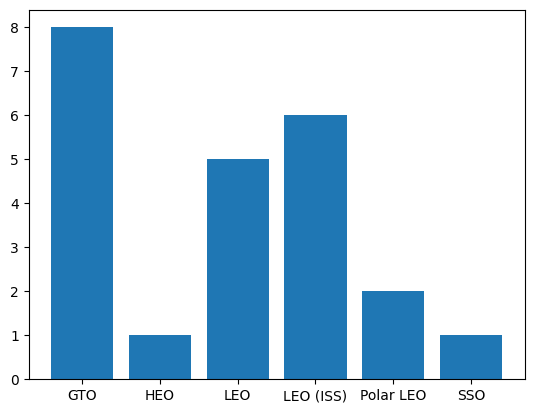

In [9]:
from matplotlib import pyplot as plt
filtered_data = data[data["Landing Outcome"].str.contains("Success")]
data1=filtered_data
data2=data1.groupby(['Orbit']).count()#.reset_index(name='size') #group Orbit to count 
x=data2['Landing Outcome'].reset_index(name='Size')
#data2
plt.bar(x['Orbit'], x['Size']) #plot the graph
plt.show()


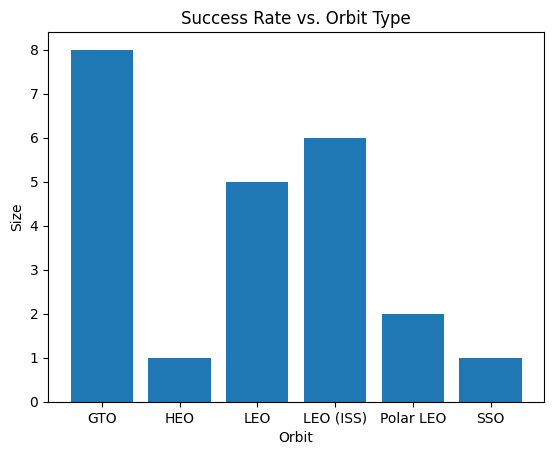

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots() # start plot the gragh
filtered_data = data[data["Landing Outcome"].str.contains("Success")]
data1=filtered_data
data2=data1.groupby(['Orbit']).count()#group Orbit to count 
x=data2['Landing Outcome'].reset_index(name='Size') # reset the index column
ax.bar(x['Orbit'], x['Size'])

ax.set_ylabel('Size')
ax.set_xlabel('Orbit')
ax.set_title('Success Rate vs. Orbit Type')

plt.show()

In [60]:
filtered_data = data[data["Landing Outcome"].str.contains("ground pad")]
data1=filtered_data
data1['Date']= pd.to_datetime(data1['Date']) # Convert the 'Date' column to datetime format
#data1.info()
date_result=data1.sort_values('Date', ascending=True) # Sort the dataframe in ascending order
date_result.head(5) # The final output

<ipython-input-60-bbf731d6fb8c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Date']= pd.to_datetime(data1['Date']) # Convert the 'Date' column to datetime format


,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Landing Outcome,class,Lat,Long
18,20,2015-12-22,1:29:00,F9 FT B1019,CCAFS LC-40,OG2 Mission 2 11 Orbcomm-OG2 satellites,2034.00,LEO,Orbcomm,Success (ground pad),1,28.562302,-80.577356
24,27,2016-07-18,4:45:00,F9 FT B1025.1,CCAFS LC-40,SpaceX CRS-9,2257.00,LEO (ISS),NASA (CRS),Success (ground pad),1,28.562302,-80.577356
36,30,2017-02-19,14:39:00,F9 FT B1031.1,KSC LC-39A,SpaceX CRS-10,2490.00,LEO (ISS),NASA (CRS),Success (ground pad),1,28.573255,-80.646895
39,33,2017-05-01,11:15:00,F9 FT B1032.1,KSC LC-39A,NROL-76,3696.65,LEO,NRO,Success (ground pad),1,28.573255,-80.646895
41,35,2017-06-03,21:07:00,F9 FT B1035.1,KSC LC-39A,SpaceX CRS-11,2708.00,LEO (ISS),NASA (CRS),Success (ground pad),1,28.573255,-80.646895


In [68]:
#import pandas as pd
filtered_data = data[data["Landing Outcome"].str.contains("Failure")]
#filtered_data
filtered_data['Date']= pd.to_datetime(filtered_data['Date']) # Convert the 'Date' column to datetime format
data6=filtered_data[filtered_data['Date'].dt.strftime('%Y') == '2015'] # filter by single year
data6[['Date','Booster Version','Landing Outcome']]

<ipython-input-68-19d8c61be85a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Date']= pd.to_datetime(filtered_data['Date']) # Convert the 'Date' column to datetime format


,Date,Booster Version,Landing Outcome
12,2015-01-10,F9 v1.1 B1012,Failure (drone ship)
15,2015-04-14,F9 v1.1 B1015,Failure (drone ship)


In [59]:
filter_2015=data[data["Date"].str.contains("2015")]
#filter_2015
x=filter_2015['Landing Outcome'].str.contains('Failure')
x

12     True
13    False
14    False
15     True
16    False
17    False
18    False
Name: Landing Outcome, dtype: bool

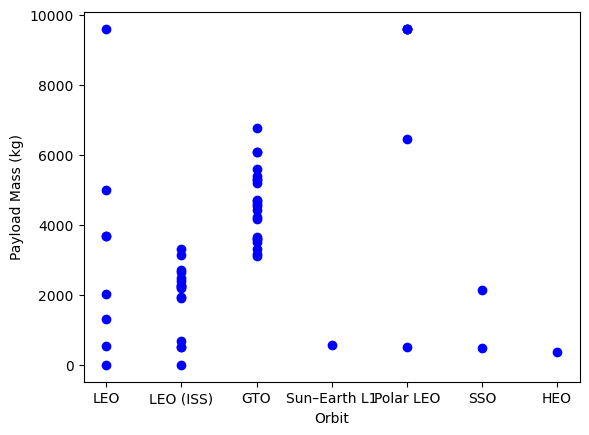

In [50]:
import matplotlib.pyplot as plt # install the app for plotting
x=data['Orbit'] # assign the Orbit columns to variable 
y=data['Payload Mass (kg)'] # assign the Payload Mass (kg) columns to variable 
plt.scatter(x,y, c='blue')
plt.xlabel("Orbit")
plt.ylabel("Payload Mass (kg)")
plt.show()



Now, you can take a look at what are the coordinates for each site.


In [7]:
# Select relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


Above coordinates are just plain numbers that can not give you any intuitive insights about where are those launch sites. If you are very good at geography, you can interpret those numbers directly in your mind. If not, that's fine too. Let's visualize those locations by pinning them on a map.


We first need to create a folium `Map` object, with an initial center location to be NASA Johnson Space Center at Houston, Texas.


In [8]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

We could use `folium.Circle` to add a highlighted circle area with a text label on a specific coordinate. For example,


In [24]:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 8; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)

and you should find a small yellow circle near the city of Houston and you can zoom-in to see a larger circle.


Now, let's add a circle for each launch site in data frame `launch_sites`


*TODO:*  Create and add `folium.Circle` and `folium.Marker` for each launch site on the site map


An example of folium.Circle:


`folium.Circle(coordinate, radius=1000, color='#000000', fill=True).add_child(folium.Popup(...))`


An example of folium.Marker:


`folium.map.Marker(coordinate, icon=DivIcon(icon_size=(20,20),icon_anchor=(0,0), html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'label', ))`


In [11]:
# Initial the map
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)
# For each launch site, add a Circle object based on its coordinate (Lat, Long) values. In addition, add Launch site name as a popup label
site_map

The generated map with marked launch sites should look similar to the following:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_markers.png">
</center>


Now, you can explore the map by zoom-in/out the marked areas
, and try to answer the following questions:

*   Are all launch sites in proximity to the Equator line?
*   Are all launch sites in very close proximity to the coast?

Also please try to explain your findings.


In [16]:
spacex_df.head(4)

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Landing Outcome,class,Lat,Long
0,1,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0.0,LEO,SpaceX,Failure (parachute),0,28.562302,-80.577356
1,2,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel o...",0.0,LEO (ISS),NASA (COTS) NRO,Failure (parachute),0,28.562302,-80.577356
2,3,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2+,525.0,LEO (ISS),NASA (COTS),No attempt,0,28.562302,-80.577356
3,4,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500.0,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356


In [25]:
spacex_df['Landing Outcome'].unique()

array(['Failure   (parachute)', 'No attempt', 'Controlled (ocean)',
       'Uncontrolled (ocean)', 'Failure  (drone ship)',
       'Precluded  (drone ship)', 'Success  (ground pad)',
       'Failure (drone ship)', 'Success  (drone ship)',
       'Success (drone ship)', 'Success (ground pad)'], dtype=object)

In [26]:
spacex_df1 = spacex_df[['Landing Outcome', 'Lat', 'Long', 'class']]
launch_sites_df2 = spacex_df1.groupby(['Landing Outcome'], as_index=False).first()
launch_sites_df3 = launch_sites_df2[['Landing Outcome', 'Lat', 'Long']]
launch_sites_df3

,Landing Outcome,Lat,Long
0,Controlled (ocean),28.562302,-80.577356
1,Failure (parachute),28.562302,-80.577356
2,Failure (drone ship),28.562302,-80.577356
3,Failure (drone ship),28.562302,-80.577356
4,No attempt,28.562302,-80.577356
5,Precluded (drone ship),28.562302,-80.577356
6,Success (drone ship),28.562302,-80.577356
7,Success (ground pad),28.562302,-80.577356
8,Success (drone ship),28.562302,-80.577356
9,Success (ground pad),28.562302,-80.577356


In [ ]:
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 8; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)

In [ ]:
# Task 2: Mark the success/failed launches for each site on the map


Next, let's try to enhance the map by adding the launch outcomes for each site, and see which sites have high success rates.
Recall that data frame spacex_df has detailed launch records, and the `class` column indicates if this launch was successful or not


In [ ]:
spacex_df.tail(10)

Next, let's create markers for all launch records.
If a launch was successful `(class=1)`, then we use a green marker and if a launch was failed, we use a red marker `(class=0)`


Note that a launch only happens in one of the four launch sites, which means many launch records will have the exact same coordinate. Marker clusters can be a good way to simplify a map containing many markers having the same coordinate.


Let's first create a `MarkerCluster` object


In [ ]:
marker_cluster = MarkerCluster()


*TODO:* Create a new column in `launch_sites` dataframe called `marker_color` to store the marker colors based on the `class` value


In [ ]:

# Apply a function to check the value of `class` column
# If class=1, marker_color value will be green
# If class=0, marker_color value will be red

*TODO:* For each launch result in `spacex_df` data frame, add a `folium.Marker` to `marker_cluster`


In [ ]:
# Add marker_cluster to current site_map
site_map.add_child(marker_cluster)

# for each row in spacex_df data frame
# create a Marker object with its coordinate
# and customize the Marker's icon property to indicate if this launch was successed or failed, 
# e.g., icon=folium.Icon(color='white', icon_color=row['marker_color']
for index, record in spacex_df.iterrows():
    # TODO: Create and add a Marker cluster to the site map
    # marker = folium.Marker(...)
    marker_cluster.add_child(marker)

site_map

Your updated map may look like the following screenshots:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_marker_cluster.png">
</center>


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_marker_cluster_zoomed.png">
</center>


From the color-labeled markers in marker clusters, you should be able to easily identify which launch sites have relatively high success rates.


In [ ]:
# TASK 3: Calculate the distances between a launch site to its proximities


Next, we need to explore and analyze the proximities of launch sites.


Let's first add a `MousePosition` on the map to get coordinate for a mouse over a point on the map. As such, while you are exploring the map, you can easily find the coordinates of any points of interests (such as railway)


In [ ]:
# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
site_map

Now zoom in to a launch site and explore its proximity to see if you can easily find any railway, highway, coastline, etc. Move your mouse to these points and mark down their coordinates (shown on the top-left) in order to the distance to the launch site.


Now zoom in to a launch site and explore its proximity to see if you can easily find any railway, highway, coastline, etc. Move your mouse to these points and mark down their coordinates (shown on the top-left) in order to the distance to the launch site.


In [ ]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

*TODO:* Mark down a point on the closest coastline using MousePosition and calculate the distance between the coastline point and the launch site.


In [ ]:
# find coordinate of the closet coastline
# e.g.,: Lat: 28.56367  Lon: -80.57163
# distance_coastline = calculate_distance(launch_site_lat, launch_site_lon, coastline_lat, coastline_lon)

In [ ]:
# Create and add a folium.Marker on your selected closest coastline point on the map
# Display the distance between coastline point and launch site using the icon property 
# for example
# distance_marker = folium.Marker(
#    coordinate,
#    icon=DivIcon(
#        icon_size=(20,20),
#        icon_anchor=(0,0),
#        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance),
#        )
#    )

*TODO:* Draw a `PolyLine` between a launch site to the selected coastline point


In [ ]:
# Create a `folium.PolyLine` object using the coastline coordinates and launch site coordinate
# lines=folium.PolyLine(locations=coordinates, weight=1)
site_map.add_child(lines)

Your updated map with distance line should look like the following screenshot:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_marker_distance.png">
</center>


*TODO:* Similarly, you can draw a line betwee a launch site to its closest city, railway, highway, etc. You need to use `MousePosition` to find the their coordinates on the map first


A railway map symbol may look like this:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/railway.png">
</center>


A highway map symbol may look like this:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/highway.png">
</center>


A city map symbol may look like this:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/city.png">
</center>


In [ ]:
# Create a marker with distance to a closest city, railway, highway, etc.
# Draw a line between the marker to the launch site


After you plot distance lines to the proximities, you can answer the following questions easily:

*   Are launch sites in close proximity to railways?
*   Are launch sites in close proximity to highways?
*   Are launch sites in close proximity to coastline?
*   Do launch sites keep certain distance away from cities?

Also please try to explain your findings.


# Next Steps:

Now you have discovered many interesting insights related to the launch sites' location using folium, in a very interactive way. Next, you will need to build a dashboard using Ploty Dash on detailed launch records.


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
